In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp2.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.873420,0.495834,0.713632,0.339841,2.016804,1.144924,1.401282,0.439024,0.000000,0.512195
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.0,0.0,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,...,0.904901,0.198069,0.741857,0.271532,1.999516,1.105093,1.334629,0.219178,0.000000,0.547945
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.741435,0.209398,0.573237,0.389380,2.791206,1.294306,1.574516,0.198864,0.000000,0.795455
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.0,0.0,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,...,1.014705,0.353106,0.768454,0.098188,1.605018,0.985509,1.301313,0.082329,0.899598,0.018072
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.0,0.0,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,...,0.897872,0.263493,0.544247,0.313578,2.351887,1.113744,1.805748,0.496552,0.000000,0.458621


## Dimensionality Reduction
On exp 1 the number of centroids was of almost the number of samples, so we have to reduce the dimensionality of the dataset.

In [5]:
corr_matrix = df_products.corr()

In [6]:
corr_matrix.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
cat_code,1.000000,-0.165161,-0.053913,0.012399,0.156458,0.319810,-0.007618,-0.075091,-0.190599,0.088835,...,-0.150774,0.294610,0.034744,0.013701,0.044998,0.237868,0.016951,-0.443946,0.107906,0.250319
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,-0.165161,1.000000,0.034796,0.435443,0.271330,-0.039674,0.015303,-0.017212,0.363418,0.160178,...,0.066170,-0.106165,0.103239,-0.105728,-0.071608,-0.116095,-0.132348,0.071422,0.008799,-0.087103
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,-0.053913,0.034796,1.000000,0.113993,0.013425,-0.018222,-0.027578,0.042309,0.130030,-0.050012,...,0.112262,-0.057705,0.005781,-0.060787,-0.019313,-0.093085,0.005121,0.164718,-0.018024,-0.143145
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,0.012399,0.435443,0.113993,1.000000,0.445524,-0.029620,0.027997,0.221156,0.296563,-0.101790,...,0.432859,-0.316590,0.216763,-0.016746,0.064929,-0.295403,-0.144387,0.075331,-0.058745,-0.129177
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,0.156458,0.271330,0.013425,0.445524,1.000000,-0.024087,0.018940,0.245958,0.441273,-0.147891,...,0.217776,-0.057996,0.188264,-0.124205,-0.061021,-0.201246,-0.166835,0.071171,-0.044325,-0.126301


In [7]:
for c1 in corr_matrix.columns: 
    for c2 in corr_matrix.columns: 
        if corr_matrix.loc[c1,c2] >= 0.6 and c1 != c2: 
            print (c1, c2)

source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2 week_number_quantity_10
source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2 week_number_quantity_27
source_channel_quantity_7261d300057219056592010c7bdaf5ee month_quantity_8
week_number_quantity_1 month_quantity_1
week_number_quantity_1 week_of_month_quantity_3
week_number_quantity_2 week_number_quantity_3
week_number_quantity_2 month_quantity_1
week_number_quantity_3 week_number_quantity_2
week_number_quantity_3 week_number_quantity_4
week_number_quantity_4 week_number_quantity_3
week_number_quantity_6 week_number_quantity_22
week_number_quantity_6 month_quantity_2
week_number_quantity_7 month_quantity_2
week_number_quantity_9 week_number_quantity_10
week_number_quantity_9 month_quantity_3
week_number_quantity_10 source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2
week_number_quantity_10 week_number_quantity_9
week_number_quantity_10 month_quantity_3
week_number_quantity_10 quarter_quantity_4
week_number_quantity_14 we

since there is a high correlation between the weeknumbers and the month

In [8]:
df_products_out = df_products.drop(columns=[c for c in df_products.columns if 'week_number' in c or
                                            'quarter' in c
                                            
                                           ])

In [9]:
df_products_out

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.000000,0.000000,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.873420,0.495834,0.713632,0.339841,2.016804,1.144924,1.401282,0.439024,0.000000,0.512195
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.000000,0.000000,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,...,0.904901,0.198069,0.741857,0.271532,1.999516,1.105093,1.334629,0.219178,0.000000,0.547945
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.000000,0.000000,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.741435,0.209398,0.573237,0.389380,2.791206,1.294306,1.574516,0.198864,0.000000,0.795455
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.000000,0.000000,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,...,1.014705,0.353106,0.768454,0.098188,1.605018,0.985509,1.301313,0.082329,0.899598,0.018072
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.000000,0.000000,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,...,0.897872,0.263493,0.544247,0.313578,2.351887,1.113744,1.805748,0.496552,0.000000,0.458621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b272ba3f4adb1dd16eaac1b53940629e,5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.120000,...,0.675063,0.198817,0.570473,0.395887,2.522709,1.481343,1.731335,0.320000,0.000000,0.680000
727673fa3e457bc596532b3eb26b23a0,0,0.017597,0.000303,0.041566,0.000303,0.0,0.012743,0.062500,0.067658,0.030036,...,1.871282,0.085197,1.048515,0.307750,2.159773,0.534393,0.950560,0.216930,0.000000,0.635922
d5bc9e14d090330cd07e6ccbcb3c3e4e,0,0.023559,0.000000,0.042861,0.011070,0.0,0.007664,0.069827,0.076923,0.041158,...,1.935569,0.036779,1.056295,0.289646,2.144001,0.516644,0.935208,0.172012,0.000000,0.669600


In [10]:
df_products_out.shape

(130, 46)

## Using Elbow optimization with KMeans

In [11]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_b76eb9b8fc0f17098812da9117d3e500',
       'source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'source_channel_quantity_fc7020775a7cdf161ab5267985c54601',
       'month_quantity_1', 'month_quantity_2', 'mo

In [12]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=2)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.6248038841766121
error = 1.6248038841766121
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.7285855469426566
error = 0.8962183372339555
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.551972310300406
error = 0.1766132366422506
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.4576278182726413
error = 0.09434449202776474
###############################
Number of Clusters: 10
Starting K-means++
Finished
J = 0.37423596896226163
error = 0.08339184931037968
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.3228845171963978
error = 0.05135145176586381
###############################
Number of Clusters: 14
Starting K-means++
Finished
J = 0.26408287922086443
error = 0.058801637975533394
###############################
Number of Clusters: 16
Starting K-m

In [13]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [14]:
len(cluster_result.labels_)

130

In [15]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.6248038841766121, 0.7285855469426566, 0.551972310300406, 0.4576278182726413, 0.37423596896226163, 0.3228845171963978, 0.26408287922086443, 0.22501013377726828, 0.20517923691138387, 0.18154885586128477, 0.165715701630774, 0.1509331087476134, 0.14158068410355482]
Ks  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]


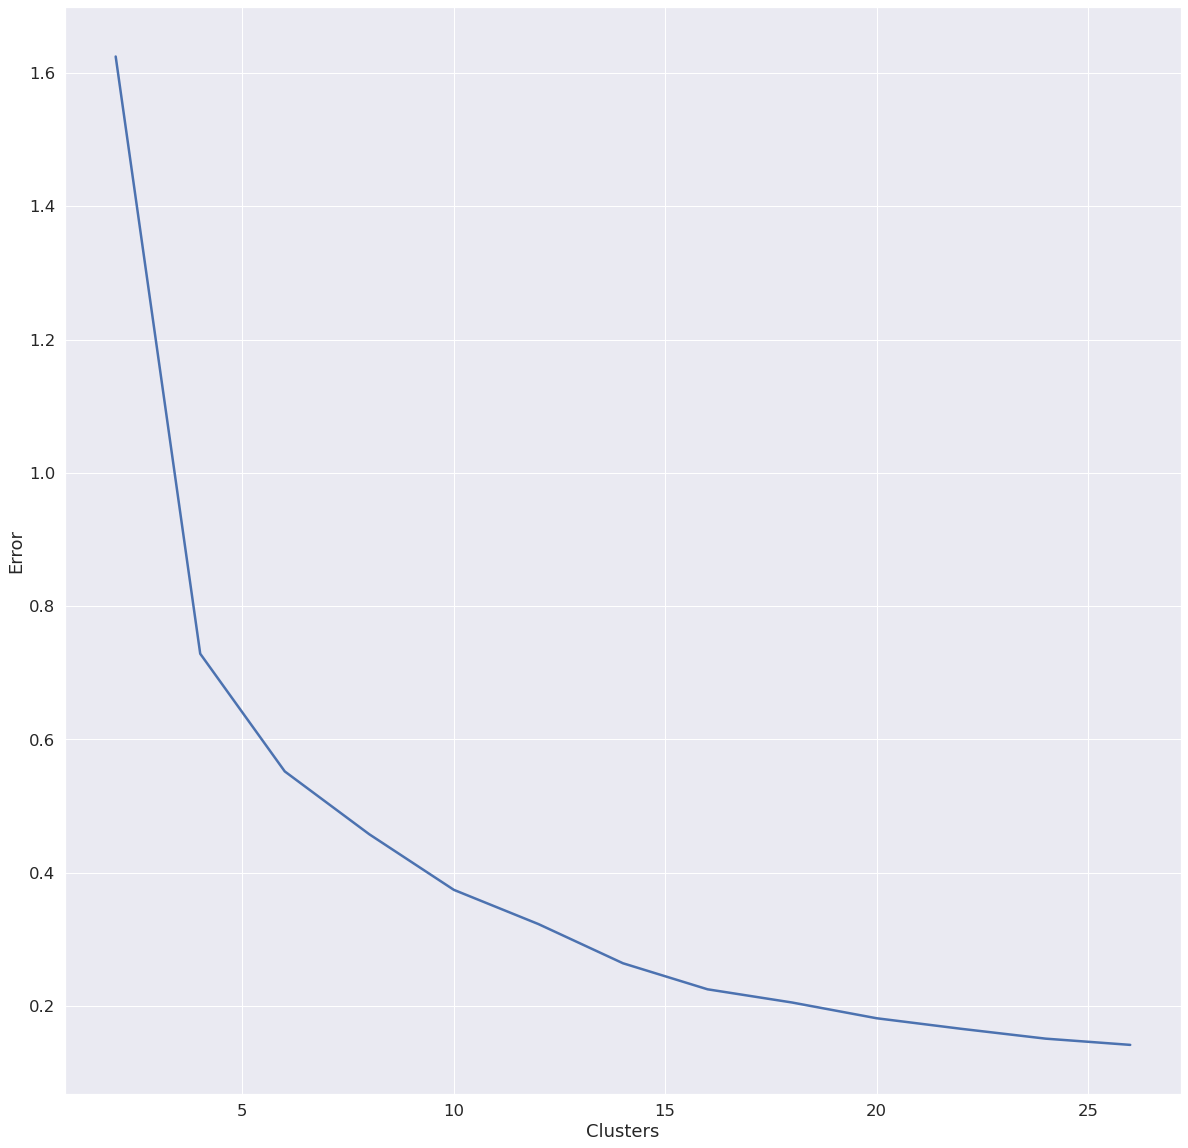

In [16]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

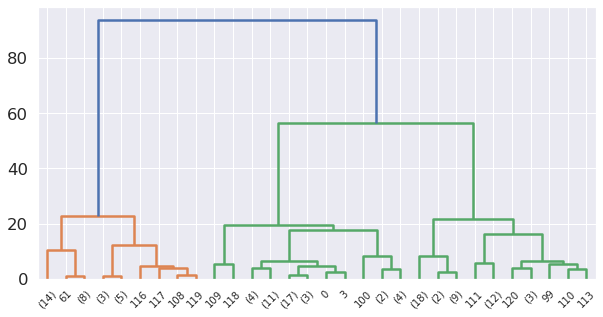

In [17]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [18]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 26)

In [19]:
df_products_out['hc_cluster'] = clusters

In [20]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,2,9
1,6,1
2,3,8
3,1,14
4,4,2
5,5,1
6,21,1
7,26,1
8,20,12


/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

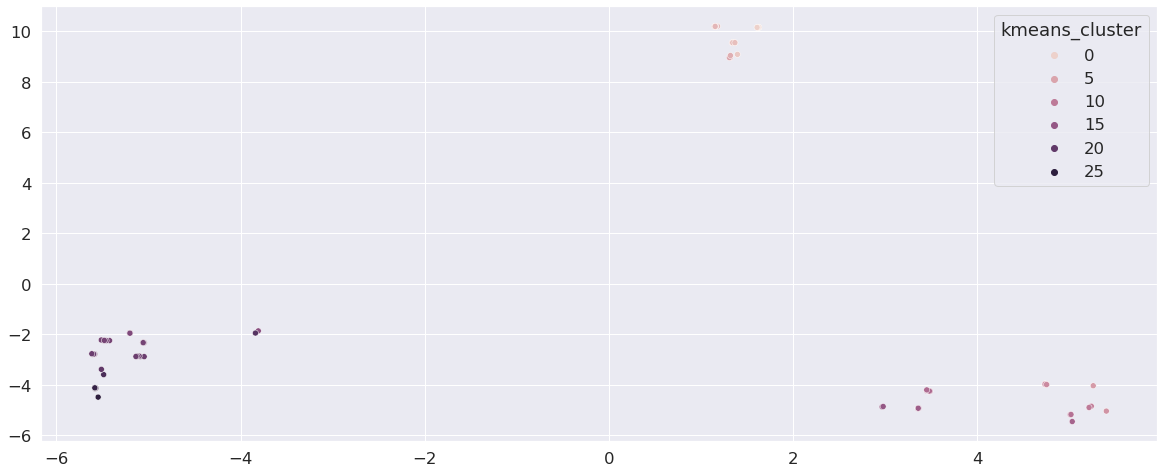

In [21]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

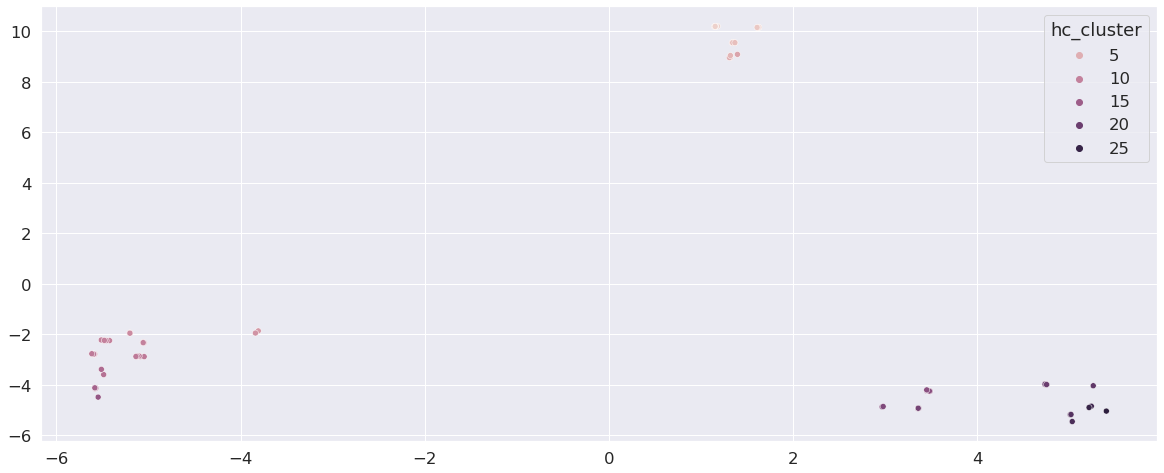

In [22]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

In [23]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.20317911173479342

Calinski and Harabaz
3098.3412584085613

Silhouette Score
0.6953378543714331



In [24]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.20317911173479342

Calinski and Harabaz
3098.3412584085618

Silhouette Score
0.6953378543714331



In [25]:
df_products_out.to_csv('../data/products_features_exp3.csv')